In [363]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import random

In [364]:
class ChargedParticle:
    def __init__(self, mass, charge, postion, velocity):
        self.m = mass
        self.q = charge
        self.r = np.array(postion)
        self.v = np.array(velocity)
        self.e_s = False
        self.l_c = 3.8461538E+14 #rubidium
        self.l_w = 3 #rubidium
        
    def PE_field(self, other_particles, E_factor=1, C_factor=0.1):
#         external=np.array([2*self.r[0], 2*self.r[1], -4*self.r[2]])
        external= [0,0,0]
        coulomb=0
        for i in other_particles:
            coulomb += 1*np.array((self.r-i.r)/np.linalg.norm(self.r-i.r))
        return(np.array(external)+np.array(coulomb))
    
    def photon_absorption(self, frequency):
        
        if self.e_s==True:
            return
        
        if (self.r[1]>-1) and (self.r[2]<-0.5):
            omega_0 = self.l_c/(2*3.14159)
            omega_L = frequency/(2*3.14159)
            T = self.l_w/(2*3.14159)
            B12 = 0.5/(1 + 4*(((omega_L-self.v[1]-omega_0)/T)**2))
            rn = random.uniform(0, 1)
            #print(B12)
            if rn<B12:
                #print(self.v[1])
                self.v[1] = self.v[1] - 0.5
            
            
        
    
#     def photon_emmision(self, beam):
    
#     def photon_stimulation(self, beam):
        
    def v_r_step(self, dt, E, B):
        v_new=[]
        Omega = (self.q*B)/self.m
        Sigma = (self.q*E)/self.m
        A = np.array((Omega*dt)/2)
        C = np.array(self.v + dt*(Sigma + np.cross(self.v, Omega/2)))
        v_new=(C + A*np.dot(A, C) - np.cross(A, C))/(1+np.dot(A, A))
        #print(np.array(v_new).shape)
        r_new = self.r + v_new*dt
        self.v = np.array(v_new)
        self.r = np.array(r_new)



def penning_electric_field2(particles):
    external=[]
    for i in range(0, len(particles)):
        external.append([2*r[i][0] , 2*r[i][1],-4*r[i][2]])
    columb=[]
    for j in range(0, len(r)):
        force=0
        for k in range(0, len(r)):
            if k != j :    
                force += 1*np.array((r[j]-r[k])/np.linalg.norm(r[j]-r[k]))
        columb.append(force)

    return(np.array(external)+np.array(columb))
        

def velocity_step(v_old, dt, q, m, E, B):
    v_new=[]
    Omega = (q*B)/m
    Sigma = (q*E)/m
    A = (Omega*dt)/2
    C = v_old + dt*(Sigma + np.cross(v_old, Omega/2))
    #print(A)
    for i in range(0, len(A)):
        v_new.append((C[i] + A[i]*np.dot(A[i], C[i]) - np.cross(A[i], C[i]))/(1+np.dot(A[i], A[i])))

    return(np.array(v_new))

def postion_step(x_old, v_new, dt):
    x_new =x_old + v_new*dt
    
    return(x_new)

def laser_abs(f, v, r, m): 
    p = -0.01
    for i in range(0, len(r)):
        if ((r[i][1] <10) and (r[i][1]>1)):
            v[i][0] = v[i][0] + p/m
            

def penning_electric_field(r):
    external=[]
    for i in range(0, len(r)):
        external.append([2*r[i][0] , 2*r[i][1],-4*r[i][2]])
    columb=[]
    for j in range(0, len(r)):
        force=0
        for k in range(0, len(r)):
            if k != j :    
                force += 1*np.array((r[j]-r[k])/np.linalg.norm(r[j]-r[k]))
        columb.append(force)

    return(np.array(external)+np.array(columb))

def RW_electric_field(r, t, w):
    external=[]
    for i in range(0, len(r)):
        external.append([0*math.cos(w*t), 0*math.sin(w*t),-4*r[i][2]])
    #print(external)
    columb=[]
    for j in range(0, len(r)):
        force=0
        for k in range(0, len(r)):
            if k != j :    
                force += 0.01*np.array((r[j]-r[k])/np.linalg.norm(r[j]-r[k]))
        columb.append(force)
    return(np.array(external)+np.array(columb))


In [370]:
## Initialise particles

particles=[]
num_particles=1
q = 1
m = 1
B=np.array([0, 0, 15])
for i in range(0, num_particles):
    #particles.append(ChargedParticle(m, q, np.random.normal(0, 0.001, 3), np.random.normal(0, 0.1, 3))) 
    particles.append(ChargedParticle(m, q, [1-2*i, 1, 1], [0.001,0, 0]))
particles=np.array(particles)

In [371]:
#iterate through steps0
T=0
V=[]
R=[]
dt=.01
time=[]

#print(x_old[1][0])
while T<50:
    time.append(T)
    r=[]
    v=[]
    for p in range(0, len(particles)):
        #print(p)
        other_particles=np.delete(particles, p)
        E = particles[p].PE_field(other_particles)
        particles[p].v_r_step(dt, E, B)
        particles[p].photon_absorption(3.8461538E+14)
        r.append(particles[p].r)
        v.append(particles[p].v)
    
    R.append(r)
    V.append(v)
    T=T+dt


In [372]:
R=np.transpose(np.array(R))
V=np.transpose(np.array(V))

In [373]:
V=np.transpose(np.array(V))

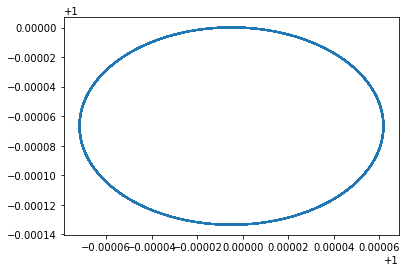

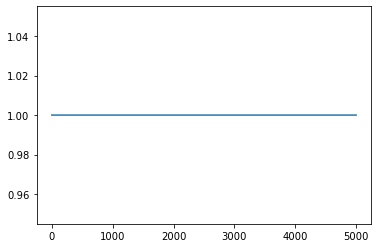

In [374]:
for i in range(0, num_particles):
    plt.plot(R[0][i], R[1][i]) 
#plt.gca().set_aspect('equal')
plt.show()

for i in range(0, num_particles):
    plt.plot(R[2][i]) 

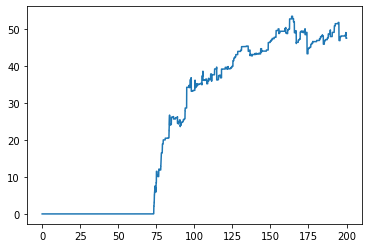

In [301]:
ave=0
for i in range(0, num_particles):
    ave+=(V[0][i]**2+V[1][i]**2+V[2][i]**2)
plt.plot(time, ave)

In [107]:
##set initial values


q= 1
m = 1


num_particles=10
#E = np.array([0.1, 0, 0])

B=[]
E=[]
v_old=[]
x_old=[]
for i in range(0, num_particles):
    B.append([0, 0, 5])
    E.append([0.1, 0, 0])
    x_old.append(np.random.normal(0, 0.1, 3))
    v_old.append(np.random.normal(0, 0, 3))

B=np.array(B)
E=np.array(E)
x_old=np.array(x_old)
v_old=np.array(v_old)


#iterate through steps0
T=0
v=[]
x=[]
dt=.01
time=[]

#print(x_old[1][0])
while T<200:
    time.append(T)
    E=penning_electric_field(x_old)
    #E = 0.5*RW_electric_field(x_old, T, 10)
    #print(v_old)
    v_old=velocity_step(v_old, dt, q, m, E, B)
    laser_abs(50000, v_old, x_old, m) 
    v.append(v_old)
    x_old=postion_step(x_old, v_old, dt)
    x.append(x_old)
    T=T+dt


In [446]:
    
V=np.transpose(np.array(v))
r=np.transpose(np.array(x))


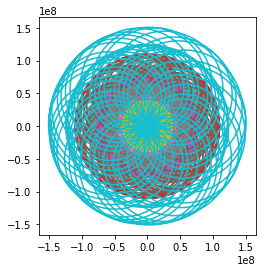

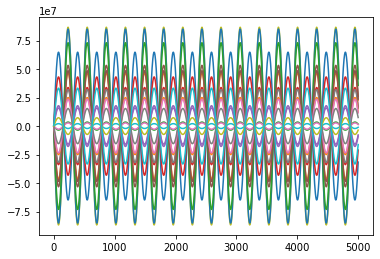

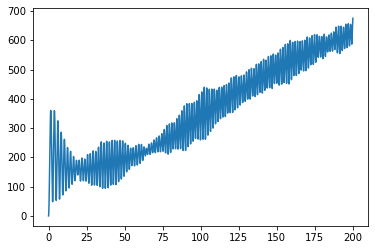

In [334]:
ave=0
for i in range(0, num_particles):
    ave+=(V[0][i]**2+V[1][i]**2+V[2][i]**2)
plt.plot(time, ave)

Text(0.5, 0, 'time')

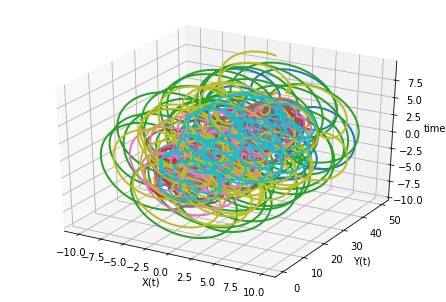

In [276]:
# ANIMATION FUNCTION
def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])
    line.set_3d_properties(dataSet[2, :num])
    return line

dataSet = np.array([r[0][i], r[1][i], time])

x, y, z = dataSet[0], dataSet[1], dataSet[2]
numDataPoints = len(r[2][i])
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure()
ax = Axes3D(fig)
# NOTE: Can't pass empty arrays into 3d version of plot()
for i in range(0, num_particles): 
    line = plt.plot(r[0][i], time,  r[1][i], lw=2)[0] 
 #= plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')# For line plot
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('time')
# Creating the Animation object
#line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line), interval=0, blit=False)
#line_ani.save(r'AnimationNew.mp4')